# Data Preprocessing @ The Davis Generation

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
df = pd.read_csv('world-happiness.csv')

## Inspecting the dataset

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


## Manipulating the rows in the dataframe


### This helps when dealing with ML algorithms as we convert categorical data into numerical data

### 1. apply method>> I will categorize my data in Family column as low, average and high

In [5]:
def replace_Family(val):
    if val<=0.5:
        return "LOW"
    elif val>0.5 and val<=1:
        return "AVERAGE"
    else:
        return "HIGH"
df["Family"]=df["Family"].apply(replace_Family,1)
   


In [6]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,HIGH,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,HIGH,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,HIGH,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,HIGH,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,HIGH,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,AVERAGE,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,LOW,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,LOW,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,LOW,0.22396,0.11850,0.10062,0.19727,1.83302


## 2. map method>>takes a dictionary as an argument

### Let me further manipulate the 'Family' col data into -1,0 and 1

In [7]:
df['Family']=df['Family'].map({
    'LOW':-1,
    "AVERAGE":0,
    "HIGH":1
}.get
)

In [8]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,-1,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,-1,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,-1,0.22396,0.11850,0.10062,0.19727,1.83302


## 3.replace method

#### I'm manipulating the data in Region to set each region to have a certain value

In [9]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [10]:
df["Region"]=df["Region"].replace({
    "Western Europe":1,
    "North America":2,
    "Australia and New Zealand":3,
    "Central and Eastern Europe":4,
    "Latin America and Caribbean":5,
    "Southeastern Asia":6,
    "Eastern Asia":7,
    "Southern Asia":8,
    "Middle East and Northern Africa":9,
    "Sub-Saharan Africa":10
    
})

In [11]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,1,1,7.587,0.03411,1.39651,1,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,1,2,7.561,0.04884,1.30232,1,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,1,3,7.527,0.03328,1.32548,1,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,1,4,7.522,0.03880,1.45900,1,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,2,5,7.427,0.03553,1.32629,1,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,10,154,3.465,0.03464,0.22208,0,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,10,155,3.340,0.03656,0.28665,-1,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,9,156,3.006,0.05015,0.66320,-1,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,10,157,2.905,0.08658,0.01530,-1,0.22396,0.11850,0.10062,0.19727,1.83302


In [12]:
df["Region"].unique()

array([ 1,  2,  3,  9,  5,  6,  4,  7, 10,  8], dtype=int64)

## Normalization

### Finding the standard deviation

In [13]:
df['Happiness Score'].min()

2.839

In [14]:
df['Happiness Score'].max()

7.587

## Min-Max technique of data normalization(# df['Happiness Score'].min()/df['Happiness Score'].max() - df['Happiness Score'].min() #)

In [15]:
df['Happiness Score'] = df['Happiness Score'].apply(lambda v:(v - df['Happiness Score'].min()/df['Happiness Score'].max() - df['Happiness Score'].min()))

In [16]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,1,1,4.373807,0.03411,1.39651,1,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,1,2,4.347807,0.04884,1.30232,1,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,1,3,4.313807,0.03328,1.32548,1,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,1,4,4.308807,0.03880,1.45900,1,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,2,5,4.213807,0.03553,1.32629,1,0.90563,0.63297,0.32957,0.45811,2.45176


In [17]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,10,154,0.251807,0.03464,0.22208,0,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,10,155,0.126807,0.03656,0.28665,-1,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,9,156,-0.207193,0.05015,0.66320,-1,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,10,157,-0.308193,0.08658,0.01530,-1,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,10,158,-0.374193,0.06727,0.20868,-1,0.28443,0.36453,0.10731,0.16681,1.56726


In [18]:
df.describe()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,6.259494,79.493671,2.162541,0.047885,0.846137,0.487342,0.630259,0.428615,0.143422,0.237296,2.098977
std,3.148512,45.754363,1.145010,0.017146,0.403121,0.635844,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,1.000000,-0.374193,0.018480,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.000000,40.250000,1.312807,0.037268,0.545808,0.000000,0.439185,0.328330,0.061675,0.150553,1.759410
50%,6.000000,79.500000,2.019307,0.043940,0.910245,1.000000,0.696705,0.435515,0.107220,0.216130,2.095415
75%,9.750000,118.750000,3.030557,0.052300,1.158448,1.000000,0.811013,0.549092,0.180255,0.309883,2.462415
max,10.000000,158.000000,4.373807,0.136930,1.690420,1.000000,1.025250,0.669730,0.551910,0.795880,3.602140


### corelation between the attributes and the final response 

In [19]:
df.corr()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,0.662363,-0.661578,0.224358,-0.622166,-0.423091,-0.742777,-0.368687,-0.154634,-0.132572,-0.146141
Happiness Rank,0.662363,1.000000,-0.992105,0.158516,-0.785267,-0.622438,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.661578,-0.992105,1.000000,-0.177254,0.780966,0.628638,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.224358,0.158516,-0.177254,1.000000,-0.217651,-0.049143,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.622166,-0.785267,0.780966,-0.217651,1.000000,0.566391,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.423091,-0.622438,0.628638,-0.049143,0.566391,1.000000,0.423689,0.389634,0.165780,0.069402,0.097881
Health (Life Expectancy),-0.742777,-0.735613,0.724200,-0.310287,0.816478,0.423689,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.368687,-0.556886,0.568211,-0.129773,0.370300,0.389634,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.154634,-0.372315,0.395199,-0.178325,0.307885,0.165780,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.132572,-0.160142,0.180319,-0.088439,-0.010465,0.069402,0.108335,0.373916,0.276123,1.000000,-0.101301


### You will note that every column against itself is 1.00 but to the other relations there is an inverse relation denoted by negative

F:\anaconda navigator\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Happiness Score'>

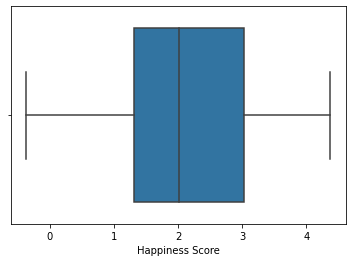

In [20]:

import seaborn as sns
sns.boxplot('Happiness Score',data=df)

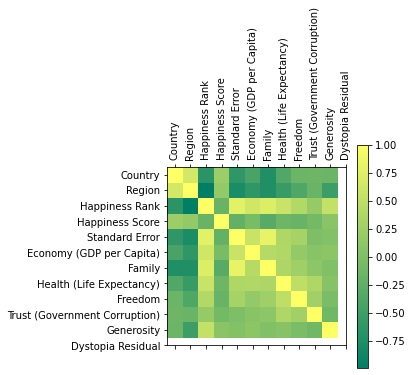

In [21]:
plt.matshow(df.corr(),cmap='summer')
plt.colorbar()
plt.xticks(list(range(len(df.columns))),df.columns,rotation='vertical')
plt.yticks(list(range(len(df.columns))),df.columns,rotation='horizontal')
plt.show()

### The above yellow zone represents the 1.00 rlshp, 

## Sorting the corelation of a single attribute against the others

In [23]:
df.corr()['Happiness Rank'].sort_values(ascending=False)

Happiness Rank                   1.000000
Region                           0.662363
Standard Error                   0.158516
Generosity                      -0.160142
Trust (Government Corruption)   -0.372315
Dystopia Residual               -0.521999
Freedom                         -0.556886
Family                          -0.622438
Health (Life Expectancy)        -0.735613
Economy (GDP per Capita)        -0.785267
Happiness Score                 -0.992105
Name: Happiness Rank, dtype: float64

### Box plot

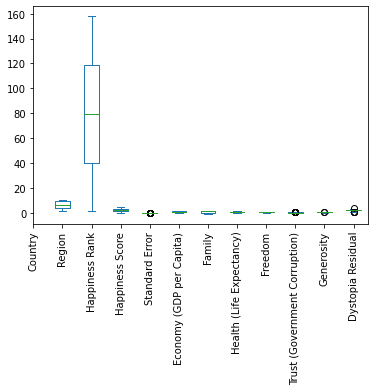

In [28]:
df.plot.box()
plt.xticks(list(range(len(df.columns))),df.columns,rotation='vertical')
plt.show()

### Linear plot

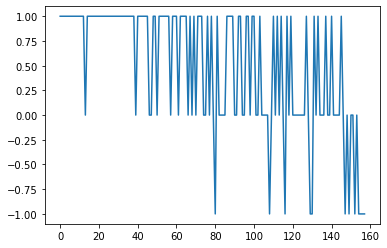

In [31]:
plt.plot(df.Family.values)
plt.show()

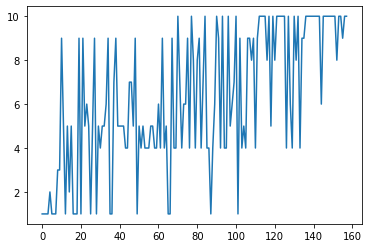

In [36]:
plt.plot(df.Region.values)
plt.show()



### Histogram 

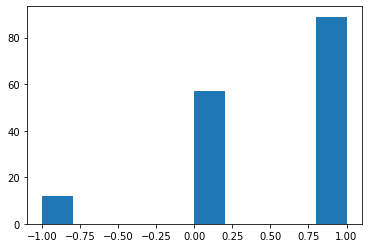

In [37]:
plt.hist(df.Family.values)
plt.show()

### Scatter plot

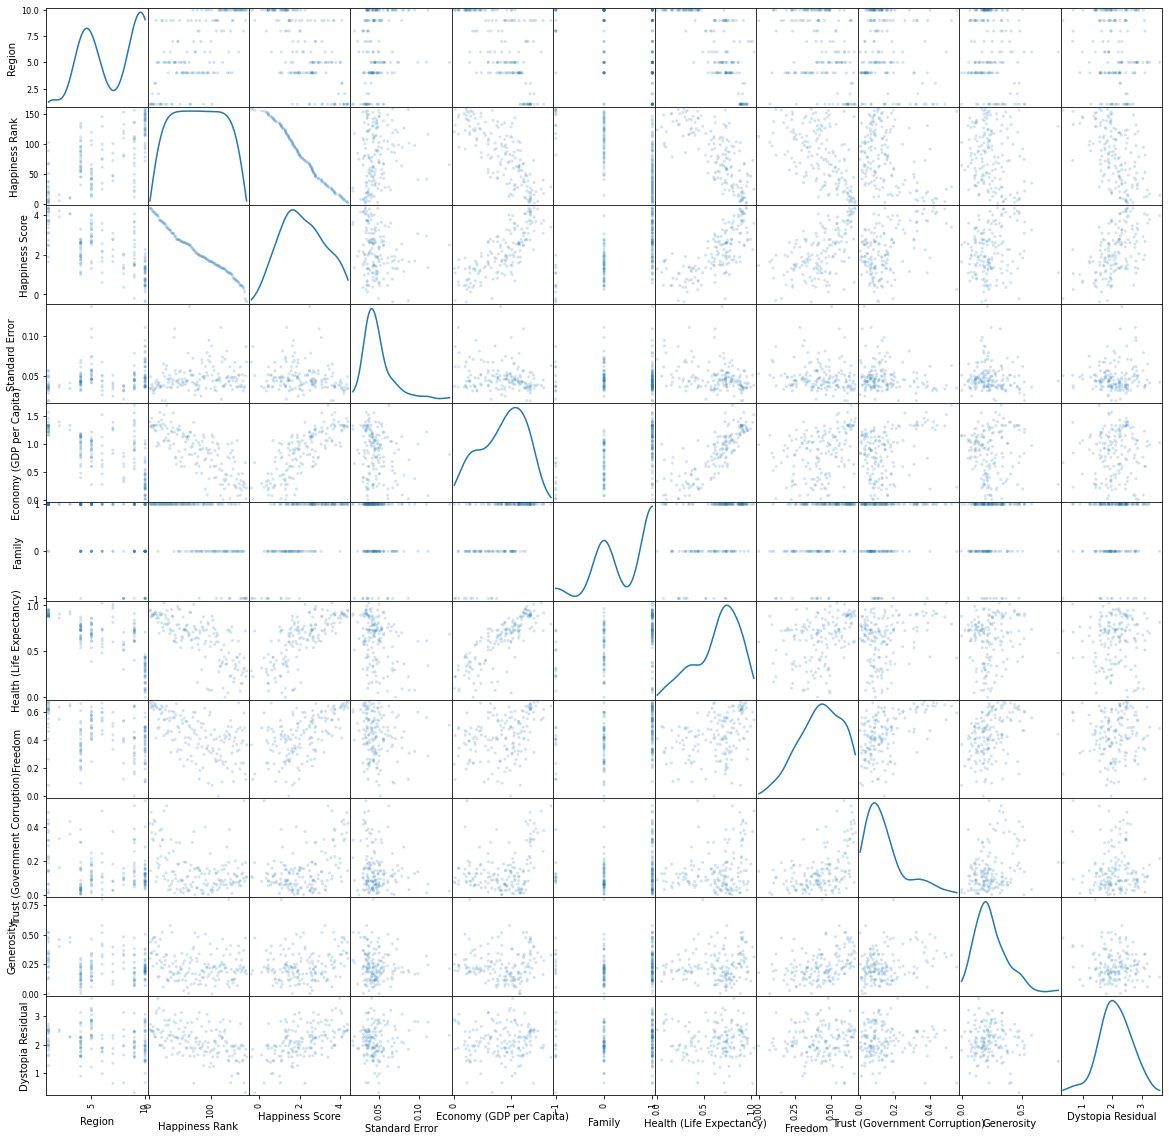

In [41]:
pd.plotting.scatter_matrix(df,alpha=0.2,figsize=(20,20),diagonal='kde')
plt.show()


### General DF plot

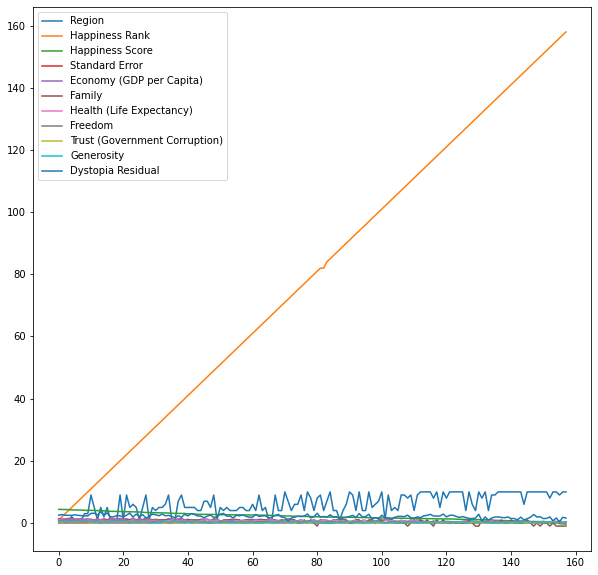

In [45]:
df.plot(figsize=(10,10))
plt.show()

### The above plot indicates that most of my data is normalized as there is no dispatched values ie:too high and too small

## Quantile

In [49]:
low=0.10
high=0.99
df.quantile([low,high])

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0.10,1.0,16.70,0.688407,0.033235,0.259954,0.0,0.261902,0.228864,0.028650,0.106185,1.456452
0.99,10.0,156.43,4.328427,0.109694,1.558387,1.0,1.000643,0.663797,0.504991,0.543707,3.220851


In [51]:
qntl=df.quantile([low,high])

In [55]:
qntl.Freedom

0.10    0.228864
0.99    0.663797
Name: Freedom, dtype: float64

### The above freedom means that 1% has 0.228 freedom while 99% has 0.66 freedom

In [56]:
qntl.Freedom[low]

0.228864

In [57]:
qntl.Freedom[high]

0.6637973

In [59]:
df.Freedom=df.Freedom.apply(lambda v : v if qntl.Freedom[low] < v < qntl.Freedom[high] else np.nan)

## This means that if the freedom between"" qntl.Freedom[low]&qntl.Freedom[high]"" we keep it as V(value) else if it's less than qntl.Freedom[low] or more than qntl.Freedom[high] we make it NaN

In [60]:
df.describe()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,140.000000,158.000000,158.000000,158.000000
mean,6.259494,79.493671,2.162541,0.047885,0.846137,0.487342,0.630259,0.457150,0.143422,0.237296,2.098977
std,3.148512,45.754363,1.145010,0.017146,0.403121,0.635844,0.247078,0.120691,0.120034,0.126685,0.553550
min,1.000000,1.000000,-0.374193,0.018480,0.000000,-1.000000,0.000000,0.229170,0.000000,0.000000,0.328580
25%,4.000000,40.250000,1.312807,0.037268,0.545808,0.000000,0.439185,0.366225,0.061675,0.150553,1.759410
50%,6.000000,79.500000,2.019307,0.043940,0.910245,1.000000,0.696705,0.458390,0.107220,0.216130,2.095415
75%,9.750000,118.750000,3.030557,0.052300,1.158448,1.000000,0.811013,0.555403,0.180255,0.309883,2.462415
max,10.000000,158.000000,4.373807,0.136930,1.690420,1.000000,1.025250,0.662460,0.551910,0.795880,3.602140


## Dropping the outliars "The NaN"

### Create a list of null values to drop

In [83]:
#Create a list of null values to drop
missing_values=["NaN",np.nan,"na"]
df = pd.read_csv('world-happiness.csv',na_values=missing_values)

### Drop values termed as null

In [87]:
df.Freedom.dropna()

0      0.66557
1      0.62877
2      0.64938
3      0.66973
4      0.63297
        ...   
153    0.59201
154    0.48450
155    0.15684
156    0.11850
157    0.36453
Name: Freedom, Length: 158, dtype: float64

### To check for any null value

In [88]:
df.Freedom.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of 0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156    False
157    False
Name: Freedom, Length: 158, dtype: bool>

### Checking for unique values 

In [86]:
df.Freedom.unique()

array([0.66557, 0.62877, 0.64938, 0.66973, 0.63297, 0.64169, 0.61576,
       0.6598 , 0.63938, 0.65124, 0.41319, 0.63376, 0.62433, 0.48181,
       0.54604, 0.49049, 0.61583, 0.61777, 0.5845 , 0.64157, 0.59625,
       0.63274, 0.42908, 0.54252, 0.5421 , 0.61477, 0.44132, 0.6404 ,
       0.55011, 0.44974, 0.46364, 0.60362, 0.53466, 0.55664, 0.31048,
       0.45951, 0.60365, 0.3974 , 0.55499, 0.59657, 0.55884, 0.4035 ,
       0.57733, 0.65821, 0.31751, 0.49615, 0.33208, 0.48574, 0.45492,
       0.26236, 0.57414, 0.32818, 0.53899, 0.51649, 0.60855, 0.21342,
       0.55475, 0.41496, 0.37938, 0.53122, 0.53024, 0.25883, 0.41668,
       0.36679, 0.50442, 0.49027, 0.40672, 0.28579, 0.24749, 0.4761 ,
       0.56066, 0.59608, 0.44888, 0.46611, 0.59444, 0.22815, 0.43477,
       0.34334, 0.53206, 0.3703 , 0.12102, 0.40661, 0.1826 , 0.51697,
       0.48827, 0.35068, 0.20107, 0.51469, 0.29671, 0.62545, 0.46582,
       0.41691, 0.33457, 0.34037, 0.35733, 0.09245, 0.31767, 0.57672,
       0.59591, 0.43

### Plotting a boxplot to check the data in Freedom column

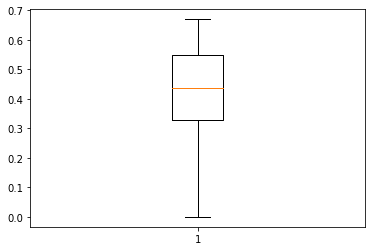

In [90]:
plt.boxplot(df.Freedom)
plt.show()

## Calculating Covariance>>helps to get how data is corelated with the other

### But it gives more standeardized values compared to corelation

In [91]:
df.cov()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,2093.461743,-51.975613,0.124358,-14.483883,-9.142720,-8.316021,-3.839647,-2.044785,-0.928243,-13.220847
Happiness Score,-51.975613,1.311048,-0.003480,0.360476,0.230969,0.204881,0.098042,0.054316,0.026156,0.336225
Standard Error,0.124358,-0.003480,0.000294,-0.001504,-0.000564,-0.001315,-0.000335,-0.000367,-0.000192,0.000797
Economy (GDP per Capita),-14.483883,0.360476,-0.001504,0.162506,0.070852,0.081323,0.022495,0.014898,-0.000534,0.008939
Family,-9.142720,0.230969,-0.000564,0.070852,0.074185,0.035741,0.018122,0.006722,0.003020,0.022332
Health (Life Expectancy),-8.316021,0.204881,-0.001315,0.081323,0.035741,0.061047,0.013422,0.007365,0.003391,0.002596
Freedom,-3.839647,0.098042,-0.000335,0.022495,0.018122,0.013422,0.022708,0.008927,0.007138,0.005237
Trust (Government Corruption),-2.044785,0.054316,-0.000367,0.014898,0.006722,0.007365,0.008927,0.014408,0.004199,-0.002200
Generosity,-0.928243,0.026156,-0.000192,-0.000534,0.003020,0.003391,0.007138,0.004199,0.016049,-0.007104
Dystopia Residual,-13.220847,0.336225,0.000797,0.008939,0.022332,0.002596,0.005237,-0.002200,-0.007104,0.306417


### Andrews curves>>plots data according to thwe class they belong to

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

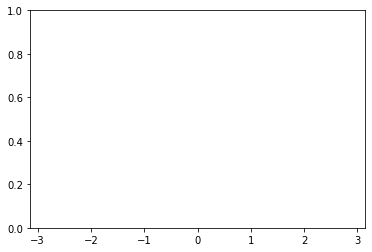

In [105]:
from pandas.plotting import andrews_curves
andrews_curves(df,'Family')
plt.show()

## Subplots gives the range of data per columns

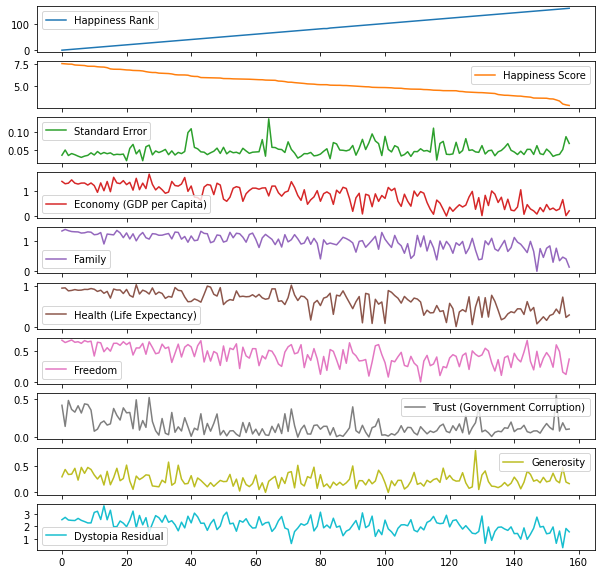

In [104]:
df.plot(subplots=True,figsize=(10,10))
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a numpy.int64

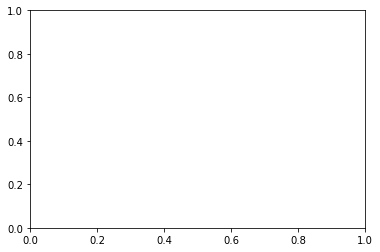

In [108]:
pd.plotting.parallel_coordinates(df,"Country",colormap='winter')
plt.show()

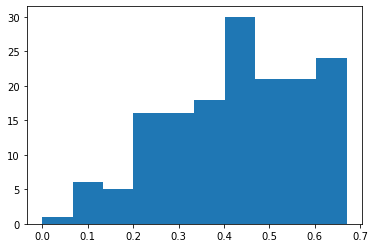

In [112]:
plt.hist(df.Freedom.values)
plt.show()

### Histogram plots

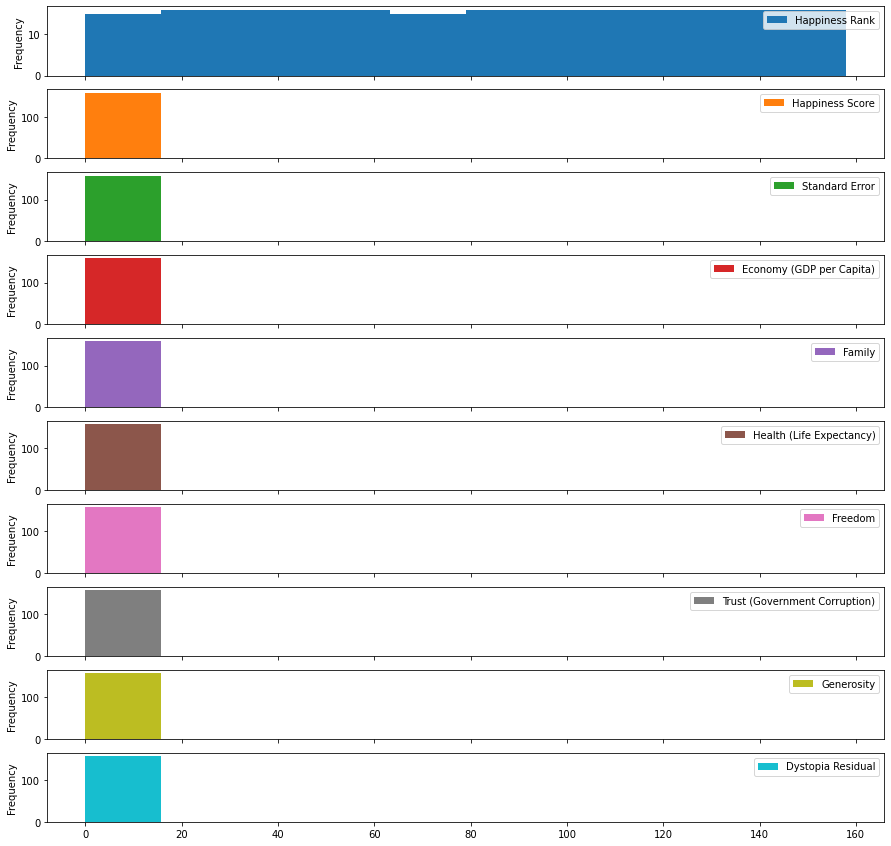

In [114]:
df.plot.hist(subplots=True,figsize=(15,15))
plt.show()

## The Davis Generation W.A +254757536155